This notebook wil explore the [dataset](data/cmd_avans_survey.xlsx).
The dataset contains multiple-choice answers on numerous miscellaneous questions about the lives of students, mainly CMD students.

The end goal is to create a (sort of) recommender system that helps people with "corona downness"


In order to do that we will create categories (profiles) of human behaviour, so it is easier to give advice

In this notebook we will explore the dataset and select the columns that we think are relevant factors of "corona downness"

In [1096]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1097]:
survey_pd = pd.read_excel("data/cmd_avans_survey.xlsx", sheet_name="Form1")
survey_pd.head()

,geslacht,Vind je jezelf makkelijk beïnvloedbaar door de media?2,Wat is je politieke voorkeur?,Welke social media gebruikt je het meest?,Vraag4,"In hoeverre is de volgende stelling bij jou van toepassing: ""Sociale media kan mij onzeker maken."" \n1 ster is niet van toepassing, 5 sterren heel erg van toepassing",Voordat je iets plaatst op social media denk je dan na wat mensen van je zullen denken?,"Hoe vaak bob je gemiddeld in de maand, als je uitgaat met je vrienden?3",Hoeveel glazen alcohol drink je gemiddeld per week?,Hou je meer van pils of speciaalbier?,...,"Hoe eigenwijs ben jij op schaal van 1 tot 5? (1 is helemaal niet, 5 is heel erg)",ben je een aanwezig persoon? of erg rustig?,Hoe werk jij het liefst?,ben je een open of gesloten persoon?,ben je een nieuwsgierig persoon?,"Ben je een zachtaardig, of een fel persoon?","Houdt je van vernieuwing? (leefomgeving, mensen, werk, school, etc.)","Hoe onzeker ben jij, op schaal van 1 tot 5?",Vind je het eng/vervelend om in een groep aan het woord te zijn?,Hoe stress gevoelig ben je op schaal van 1 tot 5?2
0,Man,nee,Links,whatsapp,NaN,3,Nee,1,6+,Speciaalbier,...,4,Aanwezig,Alleen,Matig,Erg nieuwsgierig,Zachtaardig,Ja,3,Nee,2
1,Vrouw,nee,Weet ik niet,whatsapp,NaN,3,Ja,2,0-3,Ik houd niet van bier,...,3,Matig,Alleen,Matig,Matig,Matig,Nee,4,Ja,3
2,Vrouw,nee,Rechts,instagram,NaN,5,Ja,0,0-3,Speciaalbier,...,5,Matig,Alleen,Gesloten,Erg nieuwsgierig,Fel,Nee,4,Ja,5
3,Vrouw,nee,Links,instagram,NaN,3,Ja,1,6+,Speciaalbier,...,3,Heel rustig,Tweetallen,Matig,Matig,Zachtaardig,Ja,4,Ja,3
4,Man,nee,Weet ik niet,instagram,NaN,3,Ja,0,6+,Speciaalbier,...,3,Aanwezig,Alleen,Erg open,Erg nieuwsgierig,Matig,Ja,3,Nee,2


before we select the columns we will use let's drop all the rows we really don't want to use

In [1098]:
def missing_values(df, percentage):

    columns = df.columns
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

    missing_drop = list(missing_value_df[missing_value_df.percent_missing>percentage].column_name)
    df = df.drop(missing_drop, axis=1)
    return df



In [1099]:
# because we don't only want to address (CMD) students we drop all the school questions
# we also drop all the columns that are irrelevant

survey_pd = survey_pd.drop(columns=[
    "Heb jij je propedeuse in 1 jaar gehaald?",
    "Heb je het gevoel dat je studievertraging oploopt door de corona maatregelen?",
    "Hoe snel ben jij afgeleid tijdens de onlinelessen, op schaal van 1 tot 5?",
    "Waar gebruik je het openbaar vervoer het meest voor?",
    "Moet je ook overstappen tijdens je reis?",
    "Waar maak jij graag je huiswerk?",
    "In welk schooljaar zit je?",
    "Heb je veel getwijfeld over je studie keuze?",
    "Hoe goed past CMD bij jou, op schaal van 1 tot 5? (Als je geen CMD'er bent, vul dan 0 in)",
    "Was je voor deze opleiding ook al veel creatief bezig?",
    "heb je al een duidelijk plan voor na CMD?",
    "heb je liever een theorie les, of een praktijk les?",
    "In welke omgeving heb je het liefst les?",
    "ben je tevreden met jouw school resultaten tot nu toe?",
    "heeft jouw bijbaan invloed op je schoolprestaties?",
    "Hoeveel lessen mis jij gemiddeld per maand?",
    "Hoeveel minuten duurt jouw reis van thuis naar school ongeveer?",
    "ga je met plezier naar je werk?",
    "kan jij het goed vinden met je collega's?",
    "Koop je wel eens bij de kringloop?",
    "Als percentage (i.e. 0% - 100%), hoeveel van je totale maandinkomen geef je ongeveer uit aan dingen die je niet nodig hebt om te overleven?"
],)


#'Stel jij je huiswerk veel uit?

In [1100]:
# drop all columns where more than 40 % of the answers are empty
survey_pd = missing_values(survey_pd, 40)
survey_pd.head()

,geslacht,Vind je jezelf makkelijk beïnvloedbaar door de media?2,Wat is je politieke voorkeur?,Welke social media gebruikt je het meest?,"In hoeverre is de volgende stelling bij jou van toepassing: ""Sociale media kan mij onzeker maken."" \n1 ster is niet van toepassing, 5 sterren heel erg van toepassing",Voordat je iets plaatst op social media denk je dan na wat mensen van je zullen denken?,"Hoe vaak bob je gemiddeld in de maand, als je uitgaat met je vrienden?3",Hoeveel glazen alcohol drink je gemiddeld per week?,Hou je meer van pils of speciaalbier?,Zou jij financieel onafhankelijk kunnen leven?,...,"Hoe eigenwijs ben jij op schaal van 1 tot 5? (1 is helemaal niet, 5 is heel erg)",ben je een aanwezig persoon? of erg rustig?,Hoe werk jij het liefst?,ben je een open of gesloten persoon?,ben je een nieuwsgierig persoon?,"Ben je een zachtaardig, of een fel persoon?","Houdt je van vernieuwing? (leefomgeving, mensen, werk, school, etc.)","Hoe onzeker ben jij, op schaal van 1 tot 5?",Vind je het eng/vervelend om in een groep aan het woord te zijn?,Hoe stress gevoelig ben je op schaal van 1 tot 5?2
0,Man,nee,Links,whatsapp,3,Nee,1,6+,Speciaalbier,Ja,...,4,Aanwezig,Alleen,Matig,Erg nieuwsgierig,Zachtaardig,Ja,3,Nee,2
1,Vrouw,nee,Weet ik niet,whatsapp,3,Ja,2,0-3,Ik houd niet van bier,Nee,...,3,Matig,Alleen,Matig,Matig,Matig,Nee,4,Ja,3
2,Vrouw,nee,Rechts,instagram,5,Ja,0,0-3,Speciaalbier,Nee,...,5,Matig,Alleen,Gesloten,Erg nieuwsgierig,Fel,Nee,4,Ja,5
3,Vrouw,nee,Links,instagram,3,Ja,1,6+,Speciaalbier,Nee,...,3,Heel rustig,Tweetallen,Matig,Matig,Zachtaardig,Ja,4,Ja,3
4,Man,nee,Weet ik niet,instagram,3,Ja,0,6+,Speciaalbier,Ja,...,3,Aanwezig,Alleen,Erg open,Erg nieuwsgierig,Matig,Ja,3,Nee,2


we still have 90 different questions. This is to much.
we will look at the correlations between all the 90 columns.


In [1101]:
#first create an easy way to change beween the the question name and id's


id_question = dict(enumerate(survey_pd.columns, 1))
question_id = {v: k for k, v in id_question.items()}

survey_pd = survey_pd
survey_pd.columns = list(id_question)
survey_pd.head()


,1,2,3,4,5,6,7,8,9,10,...,80,81,82,83,84,85,86,87,88,89
0,Man,nee,Links,whatsapp,3,Nee,1,6+,Speciaalbier,Ja,...,4,Aanwezig,Alleen,Matig,Erg nieuwsgierig,Zachtaardig,Ja,3,Nee,2
1,Vrouw,nee,Weet ik niet,whatsapp,3,Ja,2,0-3,Ik houd niet van bier,Nee,...,3,Matig,Alleen,Matig,Matig,Matig,Nee,4,Ja,3
2,Vrouw,nee,Rechts,instagram,5,Ja,0,0-3,Speciaalbier,Nee,...,5,Matig,Alleen,Gesloten,Erg nieuwsgierig,Fel,Nee,4,Ja,5
3,Vrouw,nee,Links,instagram,3,Ja,1,6+,Speciaalbier,Nee,...,3,Heel rustig,Tweetallen,Matig,Matig,Zachtaardig,Ja,4,Ja,3
4,Man,nee,Weet ik niet,instagram,3,Ja,0,6+,Speciaalbier,Ja,...,3,Aanwezig,Alleen,Erg open,Erg nieuwsgierig,Matig,Ja,3,Nee,2


we have to one hot encode a lot of columns to see the correlations.
To limit the amount of columns we only create dummies for a value if it occurs in more than 10 % of the rows else it will be deleted

In [1102]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_values_pd = survey_pd.select_dtypes(include=numerics)
stringed_values_pd =  survey_pd.select_dtypes(exclude=numerics)
stringed_values_pd = pd.get_dummies(stringed_values_pd)

In [1103]:
def remove_dummies(df, treshold):

    columns = df.columns
    occurrence_count = df.apply(pd.Series.value_counts)
    occurrence = occurrence_count.apply(lambda x: (x[1] / (x[0]+x[1])) * 100, axis=0)
    to_low_df = pd.DataFrame({'column_name': columns,
                                 'occurrence': occurrence})

    missing_drop = list(to_low_df[to_low_df.occurrence<treshold].column_name)
    df = df.drop(missing_drop, axis=1)
    return df


In [1104]:
stringed_values_pd = stringed_values_pd.groupby(lambda x:x, axis=1).sum()
stringed_values_pd = remove_dummies(stringed_values_pd, 10)

In [1105]:
colmun_value = [c.split('_') for c in list(stringed_values_pd.columns)]

In [1106]:
def get_numeric_columns(c_v):
    cols = set()
    #create set of unique columns
    for c in c_v:
        cols.add(c[0])
    is_numeric = [[i, True] for i in list(cols)]

    for c in c_v:
        if not c[1].isnumeric():
            for num in is_numeric:
                if num[0] == c[0]:
                    num[1] = False
    numeric = [c[0] for c in is_numeric if c[1]]
    return numeric

In [1107]:
numerics = get_numeric_columns(colmun_value)

In [1108]:
def merge_col(cols):
    col_val = [c.split('_') for c in list(cols.index)]
    # print(col_val)
    col_value = -1
    for idx, col in enumerate(cols):
        if col == 1:
            col_value = col_val[idx][1]
    return col_value


def merge_numeric(df, numerics):
    num_df = pd.DataFrame()
    for num in numerics:
        num_col = [col for col in df if col.startswith(num)]
        num_df[num] = df[num_col].apply(lambda x: merge_col(x), axis=1)
    return num_df

In [1109]:
also_numeric_pd = merge_numeric(stringed_values_pd, numerics)

In [1110]:
for num in numerics:
    stringed_values_pd = stringed_values_pd.loc[:,~stringed_values_pd.columns.str.startswith(num)]



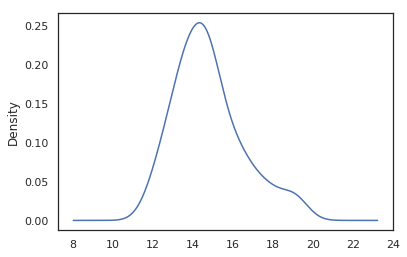

In [1111]:
survey_pd = pd.concat([stringed_values_pd, numeric_values_pd, also_numeric_pd], axis=1)

corr_matrix = survey_pd.corr()

vals = corr_matrix.abs().sum()

vals.plot.kde()


what are those features with 17.5+ correlation

In [1112]:
for i, v in vals.iteritems():
    if v >= 17.5:
        print(i)

26_Ja
26_Nee
34_Ja
34_Nee
36_Nee
3_Weet ik niet
56_N.v.t.
57_N.v.t.
58_Ja
58_N.v.t.
88_Ja
87
89
